<a href="https://colab.research.google.com/github/vjkr/AMDLab/blob/main/MultivariateLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data (Temperature & Pressure affecting Water Flow and Humidity)
np.random.seed(4)
temperature = np.random.uniform(10, 40, 100)  # Temperature in Celsius
pressure = np.random.uniform(1, 5, 100)  # Pressure in bars

# Two dependent variables: Water Flow and Humidity
water_flow = 3 * temperature + 2 * pressure + np.random.normal(0, 5, 100)
humidity = 0.5 * temperature - 0.3 * pressure + np.random.normal(0, 2, 100)

# Convert to DataFrame
df = pd.DataFrame({'Temperature': temperature, 'Pressure': pressure,
                   'Water Flow': water_flow, 'Humidity': humidity})
# Split data
X = df[['Temperature', 'Pressure']]  # Independent variables
y = df[['Water Flow', 'Humidity']]   # Multiple dependent variables

df_combined = pd.concat([X, y], axis=1)
# Display first 5 rows
print(df_combined.head())

   Temperature  Pressure  Water Flow   Humidity
0    39.010895  2.043689  119.114179  18.119884
1    26.416967  2.649889   89.026202  12.068077
2    39.180531  2.676136  115.414603  20.584123
3    31.444480  4.609687  100.075830  14.300061
4    30.931865  4.918465  102.035467  14.475739


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train multivariate regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Compute R² scores for each output variable
r2_water_flow = r2_score(y_test['Water Flow'], y_pred[:, 0])
r2_humidity = r2_score(y_test['Humidity'], y_pred[:, 1])

print(f"R² Score (Water Flow): {r2_water_flow:.2f}")
print(f"R² Score (Humidity): {r2_humidity:.2f}")

R² Score (Water Flow): 0.98
R² Score (Humidity): 0.90


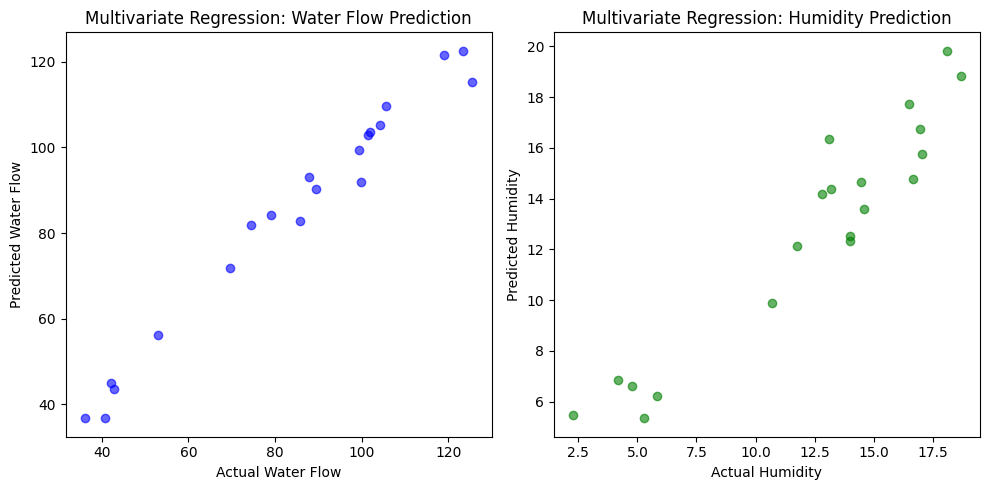

In [ ]:
# Visualization
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test['Water Flow'], y_pred[:, 0], color="blue", alpha=0.6)
plt.xlabel("Actual Water Flow")
plt.ylabel("Predicted Water Flow")
plt.title("Multivariate Regression: Water Flow Prediction")

plt.subplot(1, 2, 2)
plt.scatter(y_test['Humidity'], y_pred[:, 1], color="green", alpha=0.6)
plt.xlabel("Actual Humidity")
plt.ylabel("Predicted Humidity")
plt.title("Multivariate Regression: Humidity Prediction")

plt.tight_layout()
plt.show()

In [6]:
print("\nRegression Equations:")
print(f"Water Flow = {model.intercept_[0]:.2f} + {model.coef_[0][0]:.2f}*Temperature + {model.coef_[0][1]:.2f}*Pressure")
print(f"Humidity = {model.intercept_[1]:.2f} + {model.coef_[1][0]:.2f}*Temperature + {model.coef_[1][1]:.2f}*Pressure")


Regression Equations:
Water Flow = -1.29 + 3.03*Temperature + 2.23*Pressure
Humidity = -0.09 + 0.53*Temperature + -0.32*Pressure
